# <span style="color:blue"> (R2) Zadanie 19 STR. 37

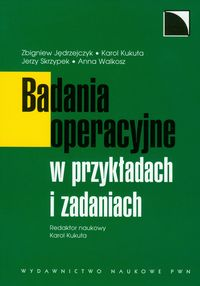

In [1]:
from beautifultable import BeautifulTable

table = BeautifulTable()
table.column_headers = ["","Składnik A", "Składnik B","Składnik C", "Cena zakupu 1q"]
table.append_row(["Pasza 1", 50, 20,  10, 180 ])
table.append_row(["Pasza 2", 20, 0, 30, 220])
table.append_row(["Pasza 3", 30, 20, 10, 130 ])
table.append_row(["Pasza 4", 0, 10, 20, 150 ])
table.append_row(["Min ilości", 1000, 800, 1150, "" ])
table.append_row(["Max ilości", 0, 0, 1700, "" ])
print(table)

+------------+------------+------------+------------+----------------+
|            | Składnik A | Składnik B | Składnik C | Cena zakupu 1q |
+------------+------------+------------+------------+----------------+
|  Pasza 1   |     50     |     20     |     10     |      180       |
+------------+------------+------------+------------+----------------+
|  Pasza 2   |     20     |     0      |     30     |      220       |
+------------+------------+------------+------------+----------------+
|  Pasza 3   |     30     |     20     |     10     |      130       |
+------------+------------+------------+------------+----------------+
|  Pasza 4   |     0      |     10     |     20     |      150       |
+------------+------------+------------+------------+----------------+
| Min ilości |    1000    |    800     |    1150    |                |
+------------+------------+------------+------------+----------------+
| Max ilości |     0      |     0      |    1700    |                |
+-----

<span style="font-size: 150%;color:#0000ff">Krok 1: ZMIENNA DECYZYJNA Czym jest x? </span>

ile trzeba kupić produktów odżywczych: 
      
     Pasza 1  - x1 
     Pasza 2  - x2
     Pasza 3  - x3
     
<span style="font-size: 150%;color:#0000ff"> Krok 2: Co jest w tabeli?</span>

Zawartość składnikach odżywczych w 1q.

<span style="font-size: 150%;color:#0000ff"> Krok 3: ograniczenie zmiennych decyzyjnych</span>

Minimalna i maksymalna składników odżywczych 

#### $
\left\{
\begin{align} 
{50x_1+20x_2 +30x_3}           & \geqslant 1000 & (1)\\ 
{20x_1       +20x_3 + 10x_4}   & \geqslant  800 & (2)\\ 
{10x_1+30x_2 +10x_3 + 20x_4}   & \geqslant 1150 & (3)\\
{10x_1+30x_2 +10x_3 + 20x_4}   & \leqslant 1700 & (4)\\
{x_1-1.5x_3}   & = 0 & (5)\\
{x_1} & \geqslant 0 & (6)\\
{x_2} & \geqslant 20 & (7)\\
{x_3} & \geqslant 0 & (8)\\
{x_4} & \geqslant 0 & (9)\\
{x_4} & \leqslant 30 & (10)\\
\end{align}
\right. 
$

<span style="font-size: 150%;color:#0000ff"> Krok 4: jaka jest funkcja celu?</span>

Zminimalizować roczny koszt zakupu paszy

$\bbox[5px,border:1px solid red]
{
\\
F(x_{1,2,3})=180x_{1}+220x_{2}+130x_{3}+150x_{4}  \to  min
\qquad 
} $

In [2]:
from pulp import *
from fractions import Fraction

# zdefiniowanie problemu- to jest taka platforma do wrzucania na nia wszystkiego

prob = LpProblem("Zadanie_19_STR_38",LpMinimize)

In [3]:
# "Continuous"
# "Integer"

x1=LpVariable("x1",lowBound=0,upBound=None, cat="Continuous")
x2=LpVariable("x2",lowBound=20,upBound=None, cat="Continuous")
x3=LpVariable("x3",lowBound=0,upBound=None, cat="Continuous")
x4=LpVariable("x4",lowBound=0,upBound=30, cat="Continuous")

### Dodajemy do platformy funkcje celu

$
F(x_{1,2,3})=180x_{1}+220x_{2}+130x_{3}+150x_{4}  \to  min
$

In [4]:
# objective function
prob += 180*x1+220*x2+130*x3+150*x4, "Minimalizacja kosztów"

In [5]:
print(prob)

Zadanie_19_STR_38:
MINIMIZE
180*x1 + 220*x2 + 130*x3 + 150*x4 + 0
VARIABLES
x1 Continuous
20 <= x2 Continuous
x3 Continuous
x4 <= 30 Continuous



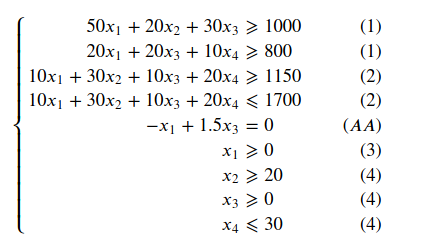

#### $
\left\{
\begin{align} 
{50x_1+20x_2 +30x_3}           & \geqslant 1000 & (1)\\ 
{20x_1       +20x_3 + 10x_4}   & \geqslant  800 & (2)\\ 
{10x_1+30x_2 +10x_3 + 20x_4}   & \geqslant 1150 & (3)\\
{10x_1+30x_2 +10x_3 + 20x_4}   & \leqslant 1700 & (4)\\
{x_1-1.5x_3}   & = 0 & (5)\\
\end{align}
\right. 
$

In [6]:
# main constraints
prob += 50*x1  + 20*x2  + 30*x3          >= 1000
prob += 20*x1  + 20*x2           + 10*x4 >= 800
prob += 10*x1  + 30*x3  + 10*x3  + 20*x4 >= 1150
prob += 10*x1  + 30*x3  + 10*x3  + 20*x4 <= 1700
prob += x1 == 1.5*x3


In [7]:
print(prob)

Zadanie_19_STR_38:
MINIMIZE
180*x1 + 220*x2 + 130*x3 + 150*x4 + 0
SUBJECT TO
_C1: 50 x1 + 20 x2 + 30 x3 >= 1000

_C2: 20 x1 + 20 x2 + 10 x4 >= 800

_C3: 10 x1 + 40 x3 + 20 x4 >= 1150

_C4: 10 x1 + 40 x3 + 20 x4 <= 1700

_C5: x1 - 1.5 x3 = 0

VARIABLES
x1 Continuous
20 <= x2 Continuous
x3 Continuous
x4 <= 30 Continuous



### Rozwiązanie problemu

In [8]:
print("prob.solve",prob.solve())
# status of the solution
print(f"Status: {LpStatus[prob.status]}")

prob.solve 1
Status: Optimal


In [9]:
for v in prob.variables():
    print(f"{v.name} = {str(Fraction(v.varValue).limit_denominator())}")


x1 = 7840909/250000
x2 = 20
x3 = 20909091/1000000
x4 = 0


In [10]:
# maximum value of the objective function
print(f"max (x11+x12+x13+x21+x22+x23+x31+x32+x33+x41+x42+x43) = {str(Fraction(value(prob.objective)).limit_denominator())}")

max (x11+x12+x13+x21+x22+x23+x31+x32+x33+x41+x42+x43) = 1276363631/100000


In [11]:
x1 = 7840909/250000
x2 = 20
x3 = 20909091/1000000
x4 = 0

In [12]:
print('x1',x1)
print('x2',x2)
print('x3',x3)
print('x4',x4)

x1 31.363636
x2 20
x3 20.909091
x4 0


<span style="font-size: 150%;color:#0000ff"> Sprawdzenie

[[21.]
 [20.]
 [14.]
 [10.]]

In [13]:
x3 = 20909091/1000000
x3

20.909091

In [14]:
x1 = 7840909/250000
x1

31.363636

In [29]:
#x1 = 21
#x2 = 20
#x3 = 14
#x4 = 10

x1 = 7840909/250000
x2 = 20
x3 = 20909091/1000000
x4 = 0

a1 = 50*x1  + 20*x2  + 30*x3          
a2 = 20*x1  + 20*x2           + 10*x4 
a3 = 10*x1  + 30*x3  + 10*x3  + 20*x4 
a4 = 10*x1  + 30*x3  + 10*x3  + 20*x4
a5 = -x1  + 1.5*x3 == 0

k =180*x1+220*x2+130*x3+150*x4

from beautifultable import BeautifulTable

table = BeautifulTable()
table.column_headers = ["Składniki:", "zawartość","Minimalna ilość składników"]
table.append_row(["A", a1, ">= 1000" ])
table.append_row(["B", a2,">= 800" ])
table.append_row(["C", a3, ">= 1150" ])
table.append_row(["C", a4, "<= 1700" ])
table.append_row(["warunek", a5,round(-x1  + 1.5*x3,6)])
table.append_row(["koszt", k,"" ])

print(table)
print()
print("x1:",round(x1 , 1))
print("x2:",round(x2 , 1))
print("x3:",round(x3 , 1))
print("x4:",round(x4 , 1))

+------------+-----------+----------------------------+
| Składniki: | zawartość | Minimalna ilość składników |
+------------+-----------+----------------------------+
|     A      | 2595.455  |          >= 1000           |
+------------+-----------+----------------------------+
|     B      | 1027.273  |           >= 800           |
+------------+-----------+----------------------------+
|     C      |  1150.0   |          >= 1150           |
+------------+-----------+----------------------------+
|     C      |  1150.0   |          <= 1700           |
+------------+-----------+----------------------------+
|  warunek   |   False   |            0.0             |
+------------+-----------+----------------------------+
|   koszt    | 12763.636 |                            |
+------------+-----------+----------------------------+

x1: 31.4
x2: 20
x3: 20.9
x4: 0


In [22]:

1.5*x3

31.3636365

In [25]:
x1

31.363636